In [0]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos


In [3]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="data.csv"
dataframe_envio_portos= pd.read_csv(nome_do_arquivo)

In [6]:
#apresentando as 5 primeiras linhas do dataset
dataframe_envio_portos.head().T

,0,1,2,3,4
valid_import,True,True,True,True,True
item,cigar,cigar,cigar,cigar,cigar
importer_id,111,111,111,111,111
exporter_id,222,222,222,222,222
country_of_origin,India,India,India,India,China
declared_quantity,129,104,130,143,141
declared_cost,3784.4,3081.35,4414.13,2533.54,4396.4
mode_of_transport,sea,sea,sea,sea,sea
route,asia,america,europe,panama,asia
date_of_departure,04/25/2019,04/22/2019,04/29/2019,05/05/2019,05/14/2019


In [7]:
dataframe_envio_portos.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


**Existem Colunas Com Valores Nulos?**

In [18]:
# Funcao para verificar valores missing no dataset
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    return dict_x

# Verificando as colunas com dados missing do dataset
missing = percent_missing(dataframe_envio_portos)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:21]    

Percent of missing data


[('valid_import', 0.0),
 ('item', 0.0),
 ('importer_id', 0.0),
 ('exporter_id', 0.0),
 ('country_of_origin', 0.0),
 ('declared_quantity', 0.0),
 ('declared_cost', 0.0),
 ('mode_of_transport', 0.0),
 ('route', 0.0),
 ('date_of_departure', 0.0),
 ('date_of_arrival', 0.0),
 ('declared_weight', 0.0),
 ('actual_weight', 0.0),
 ('days_in_transit', 0.0)]

In [8]:
dataframe_envio_portos.shape

(120, 14)

**Quantas Instâncias e Características Existem no Dataset?**



In [9]:
#analisando a "estatística" do dataset
dataframe_envio_portos.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


**Qual é o Valor Médio Para os Pesos Declarados?**

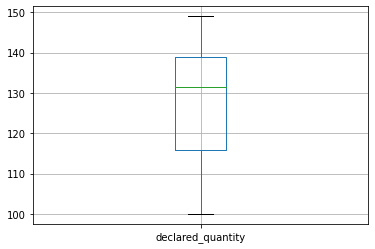

In [20]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_quantity']].boxplot()

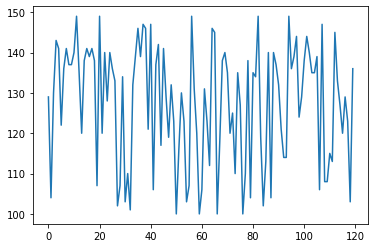

In [21]:
dataframe_envio_portos['declared_quantity'].plot()

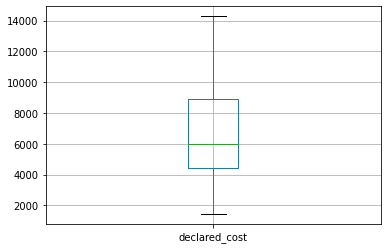

In [22]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_cost']].boxplot()

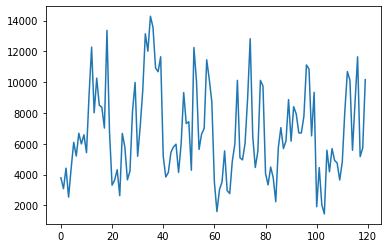

In [23]:
dataframe_envio_portos['declared_cost'].plot()

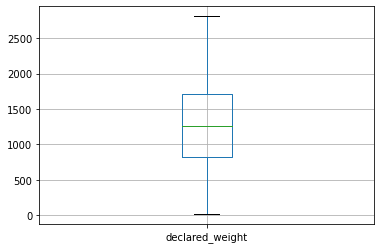

In [24]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_weight']].boxplot()

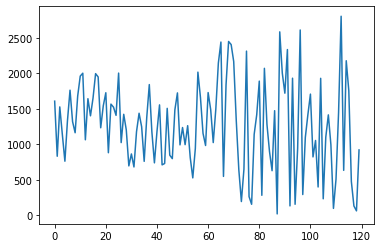

In [25]:
dataframe_envio_portos['declared_weight'].plot()

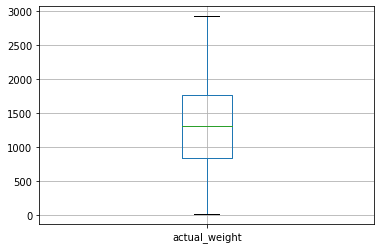

In [26]:
#identificando possíveis outliers
dataframe_envio_portos[['actual_weight']].boxplot()

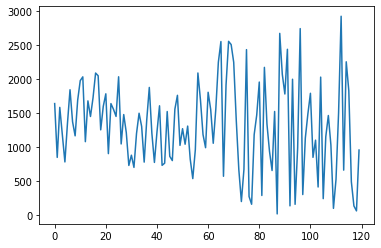

In [27]:
dataframe_envio_portos['actual_weight'].plot()

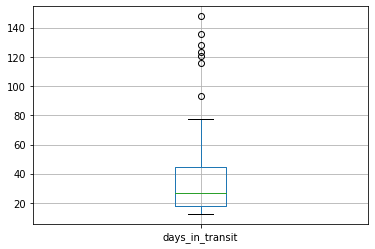

In [28]:
#identificando possíveis outliers
dataframe_envio_portos[['days_in_transit']].boxplot()

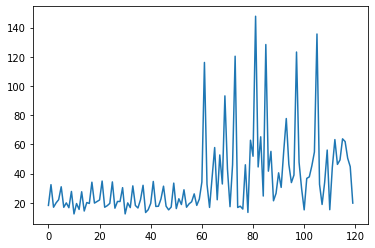

In [29]:
dataframe_envio_portos['days_in_transit'].plot()

**Existem Possíveis Outliers?**

In [0]:
#realizando a análise de regressão
x=dataframe_envio_portos['declared_weight'].values  #variável independente 
Y=dataframe_envio_portos['actual_weight'].values #variável dependente 

In [0]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [0]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

In [0]:
#realiza a previsão
previsao=reg.predict(x_Reshaped)

In [0]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [35]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [1.03718115]X -5.296233030439225
Coeficiente de Determinação (R2): 0.9993288165644932


**Pelo Coefiente de Determinação, o Que É Possível Afirmar Sobre a Relação Entre as Variáveis Peso Real x Peso Declarado?**

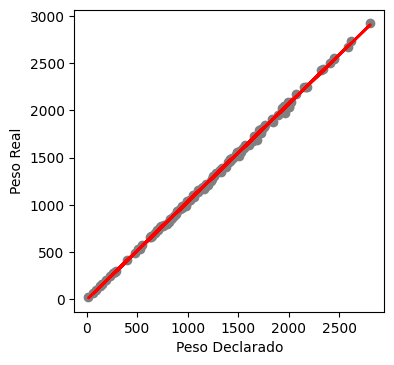

In [17]:
#realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()